In [1]:
from matplotlib.pyplot import imshow
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist_data = np.genfromtxt('MNIST4.csv',delimiter=',')

In [3]:
xavg = np.mean(mnist_data,axis=0)
X = mnist_data - xavg
S = (1.0/len(X))*(np.matmul(X.T,X))
print(S.shape)

(784, 784)


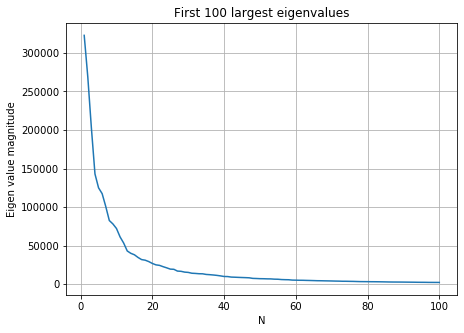

In [4]:
w,v = np.linalg.eig(S)
idx = (-np.absolute(w)).argsort()[:100]
w100 = np.real(w[idx])
v100 = np.real(v[:,idx])
eig_num = np.arange(1,101)

plt.plot(eig_num,w100)
plt.xlabel('N')
plt.ylabel('Eigen value magnitude')
title_name = 'First 100 largest eigenvalues'
plt.title(title_name)
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(7, 5)
plt.show()     

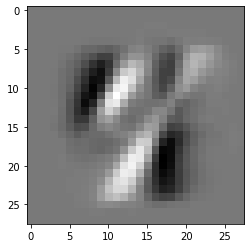

In [5]:
eigvec = v100[:,0].reshape((28,28)).T
new_eigvec = ((eigvec - eigvec.min()) * (1/(eigvec.max() - eigvec.min())) * 255).astype('uint8')
imshow(new_eigvec, cmap='gray', vmin=0, vmax=255)

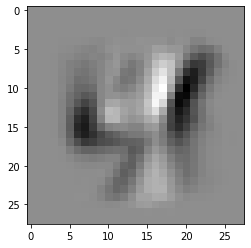

In [6]:
eigvec = v100[:,1].reshape((28,28)).T
new_eigvec = ((eigvec - eigvec.min()) * (1/(eigvec.max() - eigvec.min())) * 255).astype('uint8')
imshow(new_eigvec, cmap='gray', vmin=0, vmax=255)

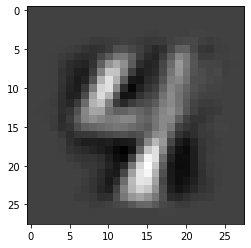

In [7]:
eigvec = v100[:,2].reshape((28,28)).T
new_eigvec = ((eigvec - eigvec.min()) * (1/(eigvec.max() - eigvec.min())) * 255).astype('uint8')
imshow(new_eigvec, cmap='gray', vmin=0, vmax=255)

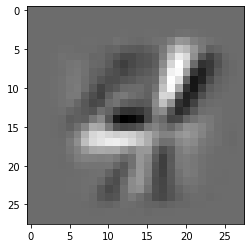

In [8]:
eigvec = v100[:,3].reshape((28,28)).T
new_eigvec = ((eigvec - eigvec.min()) * (1/(eigvec.max() - eigvec.min())) * 255).astype('uint8')
imshow(new_eigvec, cmap='gray', vmin=0, vmax=255)

In [9]:
def compress_image(data,M=1,img_id=0):
    xavg = np.mean(data,axis=0)
    X = data - xavg
    S = (1.0/len(X))*(np.matmul(X.T,X))
    w,v = np.linalg.eig(S)
    idx = (-np.absolute(w)).argsort()[:M]
    wm = np.real(w[idx]).astype('float')
    vm = np.real(v[:,idx]).astype('float')
    xin = data[img_id].reshape((-1,1))
    xout = xavg.reshape((-1,1))
    xm = xavg.reshape((-1,1))
    for i in range(M):
        vi = vm[:,i].reshape((-1,1))
        xout += (np.matmul((xin-xm).T,vi)*vi)
    img_org = xin.reshape((28,28)).T
    img_org = img_org.astype(np.uint8)
    img_cmp = xout.reshape((28,28)).T
    img_cmp = ((img_cmp - img_cmp.min()) * (1/(img_cmp.max() - img_cmp.min())) * 255).astype('uint8')
    #img_cmp = img_cmp.astype(np.uint8)
    plt.subplot(1,2,1)
    imshow(img_org, cmap='gray', vmin=0, vmax=255)
    plt.title('Original Image')
    plt.subplot(1,2,2)
    imshow(img_cmp, cmap='gray', vmin=0, vmax=255)
    title_name = 'Compressed Image (M = ' + str(M) + ')'
    plt.title(title_name)

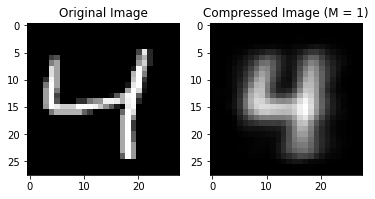

In [10]:
# M=1
compress_image(mnist_data,1,0)

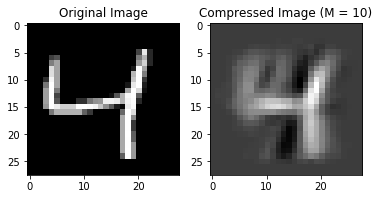

In [11]:
# M=10
compress_image(mnist_data,10,0)

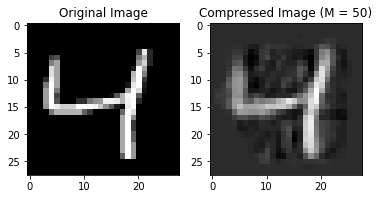

In [12]:
# M=50
compress_image(mnist_data,50,0)

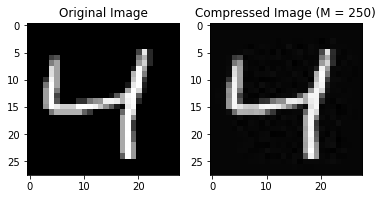

In [13]:
# M=250
compress_image(mnist_data,250,0)